In [2]:
## import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cycler
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

colors = ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB']

In [4]:
## code for the new descriptive plot histograms and medians
import pandas as pd
import matplotlib.pyplot as plt

cap = []
cap_m = []

rus = []
rus_m = []

dig = []
dig_m = []
for country in ['Belarus','Ukraine','Georgia']:
    fn = '{c}_regression.csv'.format(c=country)
    df = pd.read_csv(fn,index_col=0)
    
    #normalize so values are always positive
    #cols = ['source_russian', 'source_digital','trust_russian', 'trust_digital']
    #df[cols] = df[cols]+2

    cols = ['capitol_ordinal','source_russian','source_digital', 'trust_russian', 'trust_digital','country_future_ordinal']
    df2 = df[cols]
    df3 = df2#.groupby('capitol_ordinal').mean()
    #df3.index = ['weaker', 'no effect', 'stronger']

    #df4 = df2.groupby('capitol_ordinal').sem()
    #df4.index = ['weaker', 'no effect', 'stronger']
    
    #rus.append(df2.groupby('source_russian')['trust_russian'])
    #dig.append(df2.groupby('source_digital')['trust_digital'])
    
    #rus_se.append(df2.groupby('source_russian').sem()['trust_russian'])
    #dig_se.append(df2.groupby('source_digital').sem()['trust_digital'])
    
    cap.append(df3)
    #cap_se.append(df4)

In [37]:
def get_hist_and_means(rus):
    rus_m = rus.mean()
    rus_c = rus.value_counts()
    #normalize the distribution 
    rus_c = rus_c/rus_c.sum()
    rus_c = rus_c.loc[rus_c.index.sort_values()]

    return rus_c, rus_m


#f,ax = plt.subplots(2,3, figsize=(15,10))
f,ax = plt.subplots(3,3, figsize=(15,15))
for c_n, con_q in enumerate(['Belarus', 'Ukraine', 'Georgia']):
        #pass

    dd = cap[c_n]
    dd = dd[~dd['capitol_ordinal'].isnull()].iloc[:,[0,3,4,5]]

    cap_vals = [0,0.5,1]
    for cv, name, col in zip(cap_vals, ['weaker', 'no effect', 'stronger'], [colors[0],colors[2],colors[1]]):
        #pass
        #if name == 'stronger':
        #    break

        #cv = cap_vals[cv_i]

        rus = dd[dd.capitol_ordinal == cv]['trust_russian']
        dig = dd[dd.capitol_ordinal == cv]['trust_digital']
        future = dd[dd.capitol_ordinal == cv]['country_future_ordinal']

        rus_c, rus_m = get_hist_and_means(rus)
        dig_c, dig_m = get_hist_and_means(dig)
        future_c, future_m = get_hist_and_means(future)

        print(dig_m, con_q, name)

        ts = 13
        lw=2.5
        uniform_max = 0.04


        y_height = 0.55
        ax[0,c_n].plot(dig_c.index, dig_c.values, color = col, linewidth=lw)
        ax[0,c_n].plot([dig_m ,dig_m], [-0.2+np.random.uniform(0,uniform_max),y_height+np.random.uniform(0,uniform_max)], color = col, linestyle = ':',alpha=0.999)
        ax[0,c_n].set_xticks([-1,-2,0,1,2,3])
        ax[0,c_n].set_ylim([0, y_height])

        y_height=0.65
        #ax[0,c_n].bar([0,1,2], cap_n['source_digital'], yerr=cap_se_n['source_digital'], color='#3388BB', align='center', alpha=0.5, capsize=10)
        ax[1,c_n].plot(rus_c.index, rus_c.values, color=col, linewidth=lw)
        ax[1,c_n].plot([rus_m ,rus_m], [-0.2+np.random.uniform(0,uniform_max),y_height+np.random.uniform(0,uniform_max)], color=col, linestyle = ':')
        ax[1,c_n].set_xticks([-2,-1, 0,1, 2])
        ax[1,c_n].set_ylim([0, y_height])

        #ax[0,c_n].set_xticklabels(cap_n.index.values,fontsize=ts)

        y_height=0.85
        ax[2,c_n].plot(future_c.index, future_c.values, color=col, linewidth=lw)
        ax[2,c_n].plot([future_m ,future_m], [-0.2+np.random.uniform(0,uniform_max),y_height+np.random.uniform(0,uniform_max)], color=col, linestyle = ':')
        ax[2,c_n].set_xticks([-1, 0, 1])
        ax[2,c_n].set_xticklabels(['Russia', "Don't Know", 'EU'], fontsize=13)
        ax[2,c_n].set_ylim([0, y_height])
        
        # ax[1,c_n].bar([0,1,2], cap_n['source_russian'], yerr=cap_se_n['source_russian'], align='center', alpha=0.5,  capsize=10)
        # ax[1,c_n].set_xticks([0,1,2])
        # ax[1,c_n].set_xticklabels(cap_n.index.values,fontsize=ts)

        #plt.plot(rus_c.index, rus_c.values)
        #plt.plot([rus_m ,rus_m], [0,0.5], '--')

        ts = 21
        #if q_n == 0:
        #    #capitol_weak_strong', 'capitol_weak_noeffect', 'capitol_strong_noeffect
        q_n=0
        ax[q_n, 0].set_title("Belarus", fontsize=ts, color='gray')
        ax[q_n,1].set_title("Ukraine", fontsize=ts, color='gray')
        ax[q_n,2].set_title("Georgia", fontsize=ts, color='gray')

        ts=18
        ax[0,1].set_xlabel("Trust in Digital Media", fontsize=ts, color='gray')
        ax[1,1].set_xlabel("Trust in Russian Media", fontsize=ts, color='gray') 
        ax[2,1].set_xlabel("Country's Future: EU vs. Russia", fontsize=ts, color='gray') 
            
        ts = 16
        if c_n == 0:
            #capitol_weak_strong', 'capitol_weak_noeffect', 'capitol_strong_noeffect
            ax[0,c_n].set_ylabel("normalized freq.", fontsize=ts, color='gray')
            ax[1,c_n].set_ylabel("normalized freq.", fontsize=ts, color='gray')
            ax[2,c_n].set_ylabel("normalized freq.", fontsize=ts, color='gray')

#ax[2,0].legend(handles=legend_elements, bbox_to_anchor=(2.7, 3.8), ncol=2, fontsize=18)
legend_elements = [
    #Line2D([0], [0], color='black', lw=4, label="Country Future: Russia vs. E.U"),
    #Line2D([0], [0], color='tomato', lw=4, label="Country Future: Russia vs. Don't know"),
    #Line2D([0], [0], color='cornflowerblue', lw=4, label="Country Future: Don't know vs. EU"),
    Line2D([0], [0], marker=None, color=colors[0], linewidth=4, label='U.S will be weaker'),
    Line2D([0], [0], marker=None, color=colors[2], linewidth=4,label="No effect"),
    Line2D([0], [0], marker=None, color=colors[1], linewidth=4,label="U.S will be stronger")
]
plt.tight_layout()
ax[0,0].legend(handles=legend_elements, bbox_to_anchor=(2.85, 1.28), ncol=3, fontsize=18)

plt.savefig('descriptive_plot_with_histograms.pdf',  bbox_inches='tight')
plt.close()

-0.43315508021390375 Belarus weaker
0.21173469387755103 Belarus no effect
0.125 Belarus stronger
0.08717948717948718 Ukraine weaker
0.2047556142668428 Ukraine no effect
0.09166666666666666 Ukraine stronger
0.21468926553672316 Georgia weaker
0.34309623430962344 Georgia no effect
0.39893617021276595 Georgia stronger


In [36]:
## code for the old descriptive plot using means and error bars

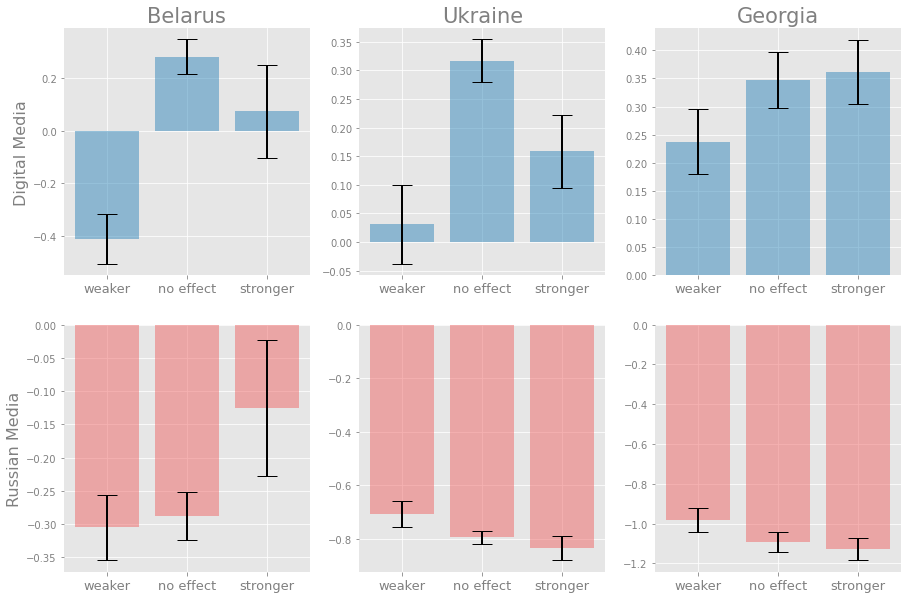

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

cap = []
cap_se = []

rus = []
rus_se = []

dig = []
dig_se = []
for country in ['Belarus','Ukraine','Georgia']:
    fn = '{c}_regression.csv'.format(c=country)
    df = pd.read_csv(fn,index_col=0)
    
    #normalize so values are always positive
    cols = ['source_russian', 'source_digital','trust_russian', 'trust_digital']
    #df[cols] = df[cols]+2

    cols = ['capitol_ordinal','source_russian','source_digital', 'trust_russian', 'trust_digital']
    df2 = df[cols]
    df3 = df2.groupby('capitol_ordinal').mean()
    df3.index = ['weaker', 'no effect', 'stronger']

    df4 = df2.groupby('capitol_ordinal').sem()
    df4.index = ['weaker', 'no effect', 'stronger']
    
    rus.append(df2.groupby('source_russian').mean()['trust_russian'])
    dig.append(df2.groupby('source_digital').mean()['trust_digital'])
    
    rus_se.append(df2.groupby('source_russian').sem()['trust_russian'])
    dig_se.append(df2.groupby('source_digital').sem()['trust_digital'])
    
    cap.append(df3)
    cap_se.append(df4)

q_n = 0

f,ax = plt.subplots(2,3, figsize=(15,10))

for c_n, con_q in enumerate(['Belarus', 'Ukraine', 'Georgia']):

    cap_n = cap[c_n]
    cap_se_n = cap_se[c_n]

    ts = 13
    ax[0,c_n].bar([0,1,2], cap_n['source_digital'], yerr=cap_se_n['source_digital'], color='#3388BB', align='center', alpha=0.5, capsize=10)
    ax[0,c_n].set_xticks([0,1,2])
    ax[0,c_n].set_xticklabels(cap_n.index.values,fontsize=ts)
    
    ax[1,c_n].bar([0,1,2], cap_n['source_russian'], yerr=cap_se_n['source_russian'], align='center', alpha=0.5,  capsize=10)
    ax[1,c_n].set_xticks([0,1,2])
    ax[1,c_n].set_xticklabels(cap_n.index.values,fontsize=ts)
    
    ts = 21
    if q_n == 0:
        #capitol_weak_strong', 'capitol_weak_noeffect', 'capitol_strong_noeffect
        ax[q_n, 0].set_title("Belarus", fontsize=ts, color='gray')
        ax[q_n,1].set_title("Ukraine", fontsize=ts, color='gray')
        ax[q_n,2].set_title("Georgia", fontsize=ts, color='gray') 
        
    ts = 16
    if c_n == 0:
        #capitol_weak_strong', 'capitol_weak_noeffect', 'capitol_strong_noeffect
        ax[0,c_n].set_ylabel("Digital Media", fontsize=ts, color='gray')
        ax[1,c_n].set_ylabel("Russian Media", fontsize=ts, color='gray')


        
#plt.savefig('raw_data_description.pdf',  bbox_inches='tight')
#plt.close()
plt.show()

In [13]:
#!pip3 install Cinemagoer
from imdb import Cinemagoer

# create an instance of the Cinemagoer class
ia = Cinemagoer()

# get a movie
movie = ia.get_movie("https://www.imdb.com/title/tt15523010/")


2022-05-01 07:40:10,378 CRITICAL [imdbpy] /Users/damianruck/Library/Python/3.7/lib/python/site-packages/imdb/_exceptions.py:34: IMDbParserError exception raised; args: ('invalid movieID "https://www.imdb.com/title/tt15523010/": invalid literal for int() with base 10: \'https://www.imdb.com/title/tt15523010/\'',); kwds: {}
Traceback (most recent call last):
  File "/Users/damianruck/Library/Python/3.7/lib/python/site-packages/imdb/parser/http/__init__.py", line 300, in _normalize_movieID
    return '%07d' % int(movieID)
ValueError: invalid literal for int() with base 10: 'https://www.imdb.com/title/tt15523010/'


IMDbParserError: invalid movieID "https://www.imdb.com/title/tt15523010/": invalid literal for int() with base 10: 'https://www.imdb.com/title/tt15523010/'

In [15]:
people = ia.search_person('Jack Nicholson')
for person in people:
   print(person.personID, person['name'])

0000197 Jack Nicholson
5504786 Jack Nicholson
11297332 Jack Nicholson
11907710 Jack Nicholson
3919431 Curt Williams
7368184 Jack Nicholson
3713421 Jack Nicholson
0629897 Nick Nicholson
0629899 Nick Nicholson
7191504 Jack Nicholls
2081235 Jack Nichols
11230861 Jack Nichols
8102284 Jack Nichols
8752691 Jack Nichols
7590823 Jack Nichols
10081517 Jack Nichols
0629600 Jack Nichols
7465499 John Jack Nicholson
9086701 Jack Nicholas
4479762 Nick Nicholson
